In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [56]:
df_assets = pd.read_excel("OASI_and_DI_Data.xlsx", index_col = 0)
df_assets.fillna(0, inplace = True)

In [58]:
df_assets.tail()

df_assets["OASDI_Trust_Fund_Net_Increase"] = df_assets["OASI Asset Net Increase During Year"] + df_assets["DI Asset Net Increase"]

In [198]:
df_assets.tail()

,OASI Total Income,OASI Total Cost,OASI Asset Net Increase During Year,Asset Reserves at end of year,DI Total Income,DI Total Cost,DI Asset Net Increase,DI Asset Reserves at end of year,Unnamed: 9,OASDI_Trust_Fund_Net_Increase
Calendar Year,,,,,,,,,,
2019,917873,911423,6450,2804322,2019.0,143901.0,147876.0,-3974.0,93083.0,154326.0
2020,968348,960954,7394,2811716,2020.0,149748.0,146260.0,3488.0,96570.0,153654.0
2021,942856,1001936,-59080,2752636,2021.0,145470.0,142646.0,2824.0,99394.0,83566.0
2022,1056718,1097455,-40737,2711899,2022.0,165063.0,146470.0,18594.0,117988.0,105733.0
2023,1166885,1237294,-70409,2641490,2023.0,183801.0,154815.0,28985.0,146973.0,84406.0


In [266]:
#Setting up for linear regression

start_year = 2010 #What year to start the regression

X = df_assets.index.to_frame(index = True).loc[start_year:2023] #getting the years in that range
y = df_assets["OASDI_Trust_Fund_Net_Increase"].loc[start_year:2023] #getting the trust fund net increase for those years

reg = LinearRegression().fit(X,y) #fit func
reg.coef_ #for eq
reg.intercept_ #for eq

#prediction
end_year = 2035 #to match with reports of 2035 insolvency, money dry out. 

pred_vals = reg.predict(np.arange(2024, end_year).reshape(-1,1)) #pred vals

pred_df = pd.DataFrame({
    "Year": range(2024, end_year),
    "pred_vals": pred_vals
})

pred_df.set_index("Year", inplace = True)

df_assets = pd.concat([df_assets, pred_df])
df_assets["Year"] = df_assets.index

df_assets

,OASI Total Income,OASI Total Cost,OASI Asset Net Increase During Year,Asset Reserves at end of year,DI Total Income,DI Total Cost,DI Asset Net Increase,DI Asset Reserves at end of year,Unnamed: 9,OASDI_Trust_Fund_Net_Increase,pred_vals,Year
1937,767.0,1.0,766.0,766.0,0.0,0.0,0.0,0.0,0.0,766.0,NaN,1937
1938,375.0,10.0,366.0,1132.0,0.0,0.0,0.0,0.0,0.0,366.0,NaN,1938
1939,607.0,14.0,592.0,1724.0,0.0,0.0,0.0,0.0,0.0,592.0,NaN,1939
1940,368.0,62.0,306.0,2031.0,0.0,0.0,0.0,0.0,0.0,306.0,NaN,1940
1941,845.0,114.0,731.0,2762.0,0.0,0.0,0.0,0.0,0.0,731.0,NaN,1941
...,...,...,...,...,...,...,...,...,...,...,...,...
2030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10859.182418,2030
2031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-593.767033,2031
2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12046.716484,2032
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23499.665934,2033


In [305]:
df_assets["OASDI_Trust_Fund_Net_Increase"][df_assets['Year'] < 2010]

1937       766.0
1938       366.0
1939       592.0
1940       306.0
1941       731.0
          ...   
2005    250433.0
2006    275722.0
2007    278090.0
2008    288221.0
2009    255418.0
Name: OASDI_Trust_Fund_Net_Increase, Length: 73, dtype: float64

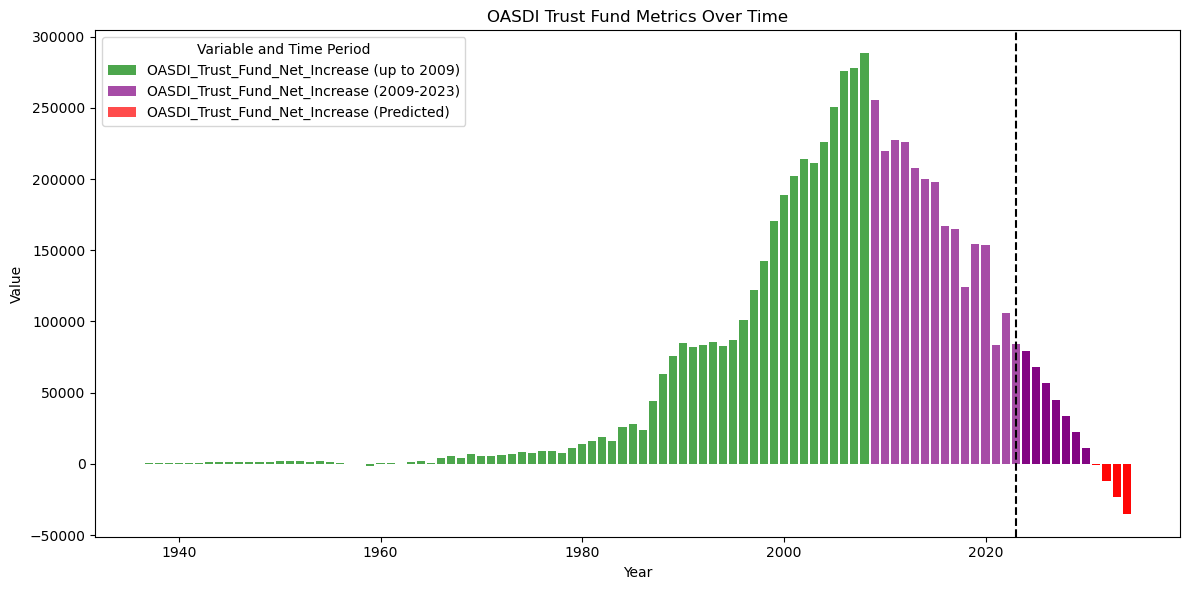

In [327]:
# List of columns to plot
plot_cols = ['OASDI_Trust_Fund_Net_Increase', 'pred_vals']

# Set the figure size
plt.figure(figsize=(12, 6))

# Filter the data for different year ranges
before_2010 = df_assets[df_assets['Year'] < 2009]
between_2010_and_2023 = df_assets[(df_assets['Year'] >= 2009) & (df_assets['Year'] <= 2030)]
after_2023 = df_assets[df_assets['Year'] > 2030]

# Plot the data in segments
for col in plot_cols:
    # Plot bars for years before 2010 (Green)
    plt.bar(before_2010["Year"], before_2010[col], color='green', alpha=0.7, label=f'{col} (up to 2009)' if col == plot_cols[0] else "")
    
    # Plot bars for years between 2010 and 2023 (Purple)
    plt.bar(between_2010_and_2023["Year"], between_2010_and_2023[col], color='purple', alpha=0.7, label=f'{col} (2009-2023)' if col == plot_cols[0] else "")
    
    # Plot bars for predicted values (Red)
    plt.bar(after_2023["Year"], after_2023[col], color='red', alpha=0.7, label=f'{col} (Predicted)' if col == plot_cols[0] else "")

# Add vertical line for year 2023 (to separate the ranges visually)
plt.axvline(x=2023, color='black', linestyle='--')

# Customize the plot with title and labels
plt.title('OASDI Trust Fund Metrics Over Time')
plt.xlabel('Year')
plt.ylabel('Value')

# Show the legend to indicate which bars correspond to which range
plt.legend(title='Variable and Time Period')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
"